Jumlah label: 8
Daftar label: ['19bc144b9ff6b98dba82e33455b48ef479e86e9a96d12791d68475c6160daba98c041c070325d7106a48067376be2be2de2aa7a4186fcd3083506b3b57a014c8'
 '37d75257504183f135dc3ff95d888b6e7c38781b7ae960c39a4979731e1d369e843b70dd8b48e82f08a129fcbd879be7506090fe0fc0aa24fbf83e46650830b5'
 '43f1c45aeda2dc88db078734c73019192661d66ff7ab0bd22cb6d29667d0f42e90ad2423cbdaef1665fe63eb64b6a6c2abfac297b0bbb67323f4539e2c759dcb'
 '45ca21320e32d55f20ed45bace764e018d93f45b4997bb84e6c8deac5595481358f2b6fafa9c4fd68e10ad5f88422f87935a2db7d5ce8beec7da41d2ada463a3'
 'a84c563de12e457cab05fc9f740efa9ea38486c3715eec36d454d86193d51540fba8c8cc9d21c2648744c5f6e4f66841925a0b4d8660a678d0ff7579b0db65e3'
 'aa49791e28b7be669d6536f3b47125d63ed975bbc4baf074f5d04b9c9fcce9b89c9c13b36a102acc1db099fe8ce5399ca4daad6cfea69f2ad61797b68f3e2224'
 'b7aa20944ce007c406725e58fd463f1e70cd47ca5121da55b069b57f65c8bed0591fea005cc064e92ed0aaff23cbf989e6a82310643144d2747ec3a9e05117eb'
 'f77b48e73f44fac6cdb8e31ca43b66b119a7238aa019

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 386ms/step - accuracy: 0.1083 - loss: 2.5228 - val_accuracy: 0.3000 - val_loss: 2.0640
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.2229 - loss: 2.0688 - val_accuracy: 0.2000 - val_loss: 2.0525
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.3146 - loss: 1.7835 - val_accuracy: 0.3000 - val_loss: 2.0389
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.3750 - loss: 1.5807 - val_accuracy: 0.3000 - val_loss: 2.0399
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.5646 - loss: 1.3429 - val_accuracy: 0.3000 - val_loss: 2.0417
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6625 - loss: 1.3327 - val_accuracy: 0.3000 - val_loss: 2.0351
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.7667 - loss: 1.1201 - val_accuracy: 0.2000 - val_loss: 2.0150
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6687 - loss: 1.0701 - val_accuracy: 0.2000 - val_loss: 2.0028
Epoch 9/60

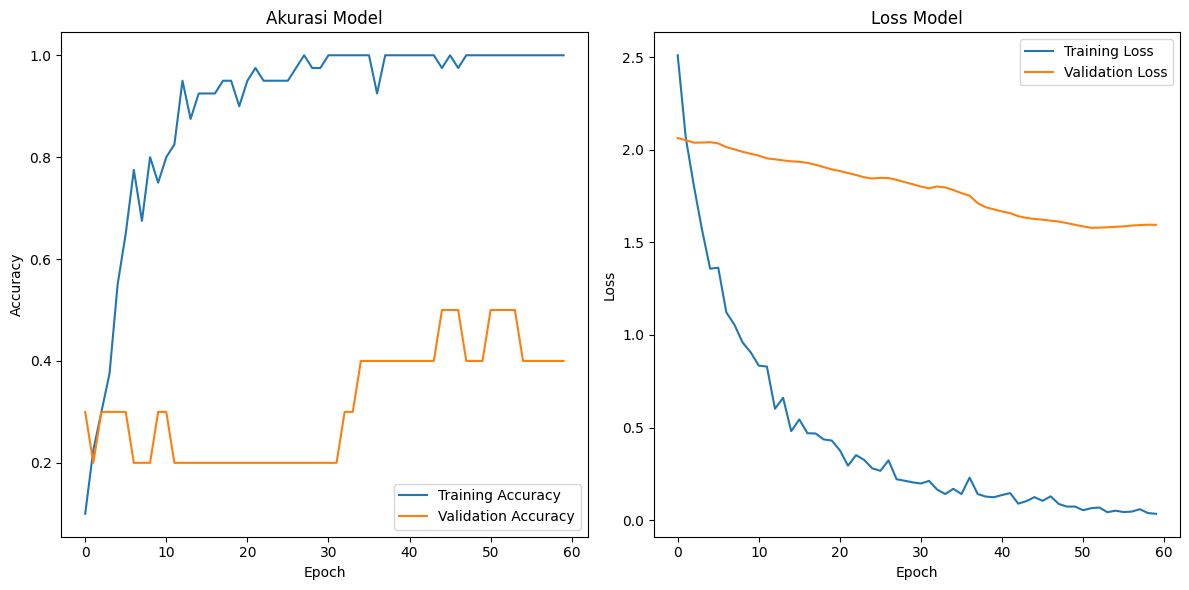

In [92]:
import os
import librosa
import librosa.display
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Path ke folder data
data_path = r"D:\PT. Sharing Vision Indonesia\Division_ Research and Development\penugasan\20241223_ Penulisan Buku AI\coding\cv-corpus-16.1-delta-2023-12-06-id\cv-corpus-16.1-delta-2023-12-06\id"
clips_folder = os.path.join(data_path, "clips")
metadata_path = os.path.join(data_path, "other.tsv")

# Load metadata
df = pd.read_csv(metadata_path, sep="\t")

# Ekstraksi MFCC dari file audio
def extract_mfcc(audio_path, max_pad_len=100):
    y, sr = librosa.load(audio_path, sr=16000)  # Load file audio
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Ekstrak 13 MFCC
    pad_width = max_pad_len - mfcc.shape[1]  # Hitung jumlah padding yang diperlukan
    
    if pad_width > 0:
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_pad_len]  # Jika lebih panjang, dipotong
    
    return mfcc.T  # Transpose agar sesuai input LSTM

# Load data
X, y = [], []
max_pad_len = 100  # Panjang maksimal sequence

for index, row in df.iterrows():
    file_name = row["path"]
    client_id = row["client_id"]  # Menggunakan client_id sebagai label
    file_path = os.path.join(clips_folder, file_name)
    
    if os.path.exists(file_path):
        mfcc_features = extract_mfcc(file_path, max_pad_len)
        X.append(mfcc_features)
        y.append(client_id)

# Konversi label (client_id) menjadi kategori numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Ubah label teks menjadi angka
y_onehot = to_categorical(y_encoded)  # One-hot encoding

# Menampilkan jumlah label dan daftar label yang ada
num_labels = len(label_encoder.classes_)  # Jumlah label yang ada
labels = label_encoder.classes_  # Daftar label

print(f"Jumlah label: {num_labels}")
print(f"Daftar label: {labels}")

# Padding pada data input agar ukuran sama
X_padded = pad_sequences(X, maxlen=max_pad_len, dtype="float32", padding="post")

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_onehot, test_size=0.2, random_state=42)

# Bentuk data setelah preprocessing
print(f"Shape X_train: {X_train.shape}")
print(f"Shape y_train: {y_train.shape}")

# Build LSTM Model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(max_pad_len, 13)),
    BatchNormalization(),
    Dropout(0.3),
    
    LSTM(64, return_sequences=False),  # Layer terakhir tidak pakai return_sequences
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation="relu"),
    Dense(y_onehot.shape[1], activation="softmax")  # Jumlah output sesuai jumlah kelas
])

# Compile Model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train Model
history = model.fit(X_train, y_train, batch_size=32, epochs=60, validation_data=(X_test, y_test))

# Simpan Model
output_dir = os.path.join(data_path, ".keras")
os.makedirs(output_dir, exist_ok=True)  # Membuat folder .keras jika belum ada
model.save(os.path.join(output_dir, "lstm_speaker_model.keras"))

# Simpan kelas label
classes_path = os.path.join(output_dir, "classes.npy")
np.save(classes_path, label_encoder.classes_)

print("Training selesai dan model telah disimpan.")

# Plotting Akurasi dan Loss
import matplotlib.pyplot as plt

# Plot Akurasi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [100]:
# Fungsi untuk testing file audio dengan label otomatis berdasarkan metadata
def test_audio(file_path, metadata_df, max_pad_len=100):
    # Mengambil nama file audio dari path
    file_name = os.path.basename(file_path)
    
    # Cetak path file untuk memverifikasi
    print(f"File Audio: {file_name}")
    
    # Mencari client_id yang sesuai dengan file_name
    label_row = metadata_df[metadata_df['path'] == file_name]
    
    if label_row.empty:
        print("Label tidak ditemukan di metadata.")
        return None, None
    
    # Ambil client_id sebagai label asli
    true_label = label_row.iloc[0]["client_id"]
    
    # Ekstrak MFCC dari file audio
    mfcc_features = extract_mfcc(file_path, max_pad_len)
    
    # Padding pada data input agar ukuran sama
    X_test = pad_sequences([mfcc_features], maxlen=max_pad_len, dtype="float32", padding="post")
    
    # Lakukan prediksi
    predicted_probs = model.predict(X_test)
    predicted_label_index = np.argmax(predicted_probs, axis=1)[0]
    
    # Decode hasil prediksi
    classes_path = os.path.join(data_path, ".keras", "classes.npy")
    if os.path.exists(classes_path):
        label_encoder.classes_ = np.load(classes_path, allow_pickle=True)  # Set allow_pickle=True
    else:
        raise FileNotFoundError("File 'classes.npy' tidak ditemukan. Pastikan Anda menyimpan file kelas selama training.")
    
    predicted_label = label_encoder.classes_[predicted_label_index]
    
    # Cetak label asli dan hasil prediksi
    print(f"Label Asli: {true_label}")
    print(f"Hasil Prediksi: {predicted_label}")
    
    return true_label, predicted_label

# Contoh penggunaan dengan label otomatis
test_audio_path = r"D:\PT. Sharing Vision Indonesia\Division_ Research and Development\penugasan\20241223_ Penulisan Buku AI\coding\cv-corpus-16.1-delta-2023-12-06-id\cv-corpus-16.1-delta-2023-12-06\id\clips\common_voice_id_38518210.mp3"
true_label, predicted_label = test_audio(test_audio_path, df)

File Audio: common_voice_id_38518210.mp3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Label Asli: 37d75257504183f135dc3ff95d888b6e7c38781b7ae960c39a4979731e1d369e843b70dd8b48e82f08a129fcbd879be7506090fe0fc0aa24fbf83e46650830b5
Hasil Prediksi: 37d75257504183f135dc3ff95d888b6e7c38781b7ae960c39a4979731e1d369e843b70dd8b48e82f08a129fcbd879be7506090fe0fc0aa24fbf83e46650830b5
